**Ghailan Fadah**

Spring 2022

CS 251: Data Analysis and Visualization

Project 5: Clustering

In [87]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

In [88]:
import pandas as pd

        x       y
0  0.3380  4.4672
1 -1.5339  3.0250
2 -1.6950  2.8280
3 -1.6546  2.6227
4  2.0940  0.9922


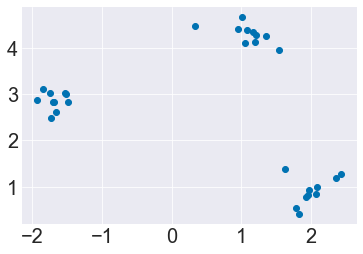

In [89]:
data = pd.read_csv('data/super_simple.csv')
print(data.head())
plt.scatter(data['x'], data['y'])
data = data.to_numpy()



### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$ for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [90]:
cluster = kmeans.KMeans(data)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [91]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99

if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')



All good!


#### Test `dist_pt_to_pt`

In [92]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [93]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [94]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `assign_labels`

In [95]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.assign_labels(init_centroids)
print(f'After the first assign data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first assign data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids`

In [96]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]


You should see:

    After the first centroid update, your cluster assignments are:
        [[ 1.09087  4.29295]
         [-1.68133  2.85917]
         [ 2.00717  0.9184 ]]
    Your difference from previous centroids:
        [[ 0.75287 -0.17425]
         [ 0.15877 -0.25313]
         [ 0.21407  0.3757 ]]

#### Test `inertia`

In [97]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.10738760429999998
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot. Make sure that the cluster assignment looks like the following image:

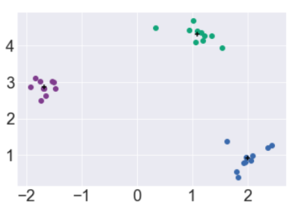

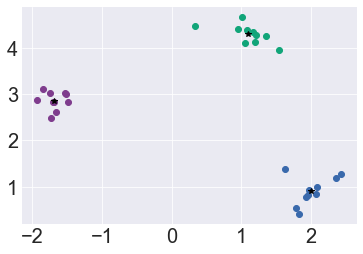

In [98]:
np.random.seed(0)
cluster = kmeans.KMeans(data)
cluster.cluster(3)
cluster.plot_clusters()


### 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset. This is the first step in a two-step implementation. For this simple data set, the clusters are not as sensitive to the initial conditions (randomly chosen centroids) as for other data. We will be making the elbow plot with just one run of kmeans per number of clusters.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

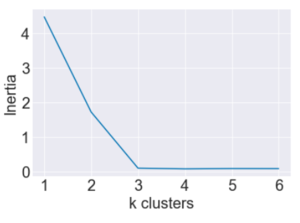

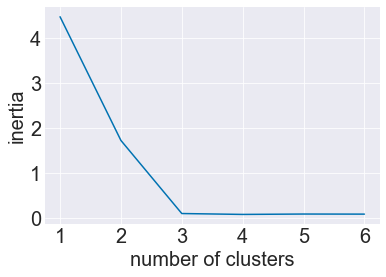

In [99]:
cluster.elbow_plot(6)

**Question 1:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer:** 
There are 3 clusters. between 1 and 3 we achieve a huge reduction in inertia which is what we want however after 3 cluster the inertia is not significantly reduced and therefore this would be similar to overfitting.

#### Determine number of clusters in `five_blobs` dataset

- Load in the `five_blobs` dataset.
- Repeat 5 times:
    - Run K-means on it.
    - Create a scatterplot to visualize the clustering.
    - Print the inertia or include it in the title

**NOTE:** Keep the random seed line in each of the 5 cells below.

In [14]:
# Load in the data and put it into a matrix in this cell
blobs_data = pd.read_csv('data/five_blobs.csv')
blobs_data = blobs_data.to_numpy()

10.094389877943534


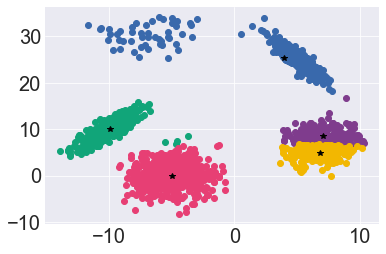

In [15]:
# Run the clustering algorithm and plot the results for one seed.
np.random.seed(0)
k_means = kmeans.KMeans(blobs_data)
inertia, diff = k_means.cluster(5)
print(inertia)
k_means.plot_clusters()



9.980672698266838


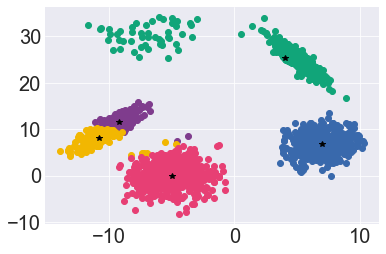

In [16]:
# Run the clustering algorithm and plot the results for a second seed.
np.random.seed(1)
inertia, diff = k_means.cluster(5)
print(inertia)
k_means.plot_clusters()


10.094389877943534


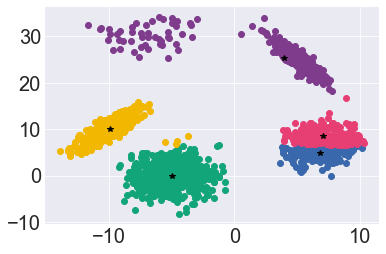

In [17]:
# Run the clustering algorithm and plot the results for a third seed.
np.random.seed(2)
inertia, diff = k_means.cluster(5)
print(inertia)
k_means.plot_clusters()


9.797201783069902


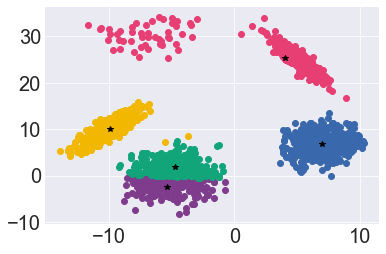

In [18]:
# Run the clustering algorithm and plot the results for a fourth seed.
np.random.seed(3)
inertia, diff = k_means.cluster(5)
print(inertia)
k_means.plot_clusters()


7.115591545930545


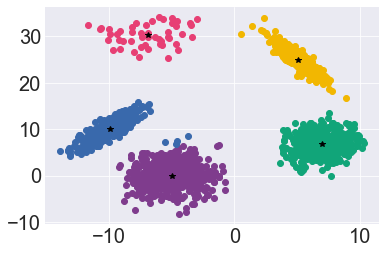

In [19]:
# Run the clustering algorithm and plot the results for a fifth seed.
np.random.seed(4)
inertia, diff = k_means.cluster(5)
print(inertia)
k_means.plot_clusters()


**Question 2:** What's wrong with clusters shown in the scatterplots? Why does it happen? Does the value of the inertia make sense for each of the images?

The clustering showing in the scatterplots are not the optimal solution. As seen above the inertia is higher when a natural blop is broken up into two clusters this makes sense since it results in an increase in distance between each point and its centeroid therefore increasing the inertia

**Answer:** 

**Question 3:** An elbow plot should show that increasing the number of clusters decreases the inertia. Does this plot have that trend? If not, why not?

**Answer:** 
N/A 

#### Run K-means multiple times, save the best clustering

To address the problems faced above, we can run K-means multiple times and take the best results for our clustering.

- Implement `cluster_batch`
- Run `cluster_batch` with a sensible $k$ value and `n_iter=10`
- Run `plot_clusters` again.
- Report the inertia either by printing it out or adding to the figure title.

7.115591545930545


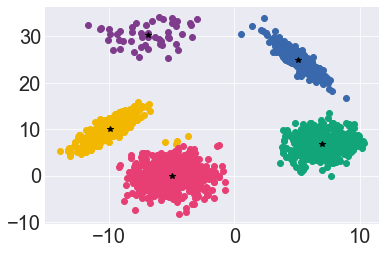

In [20]:
k_means.cluster_batch(5, 10)
print(k_means.inertia)
k_means.plot_clusters()


**Question 4:** Did the clustering improve? Why?

**Answer:** 
Yes it did improve since we ran Kmeans multiple times with different inital conditions it led to different outcomes and we stored the best one, the one with the least inertia. Therefore, this led to a better clustering

#### Improve the elbow plot for the `five_blobs` dataset

This is the second step in a two-step implementation of the `elbow_plot`. We have seen that k-means clustering can be sensitive to initial conditions, and that it is helpful to run it multiple times to find the best clusters. In this step, we alter `elbow_plot` to call `cluster_batch` instead of `cluster`.

- Add a parameter `n_iter` to `elbow_plot` in `kmeans.py`. Give it a default value of 1. (And don't forget to update the docstring to include the new parameter!)
- Change the `elbow_plot` code to call `cluster_batch` instead of `cluster`.
- Create an elbow plot showing the inertia with different $k$ values. This could take a long time to run, so we suggest using `n_iter=10` and a maximum `k` of 10.

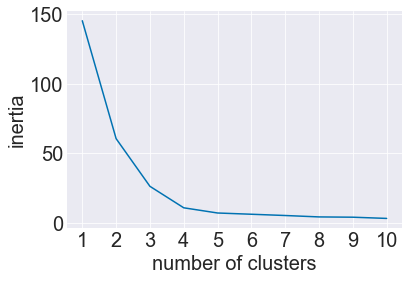

In [69]:
k_means.elbow_plot(10,10)

**Question 5:** Does this elbow plot look more like we expected than the original? How many clusters are there? Is it easy or hard to determine? Does it make sense?

**Answer:** 
This elbow plot is the expected elbow plot due to it looking like an elbow. We can see there are about 5 clusters and it is easy to determine due to the simplicity of the plot. It does make sene

## Task 2: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 2a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

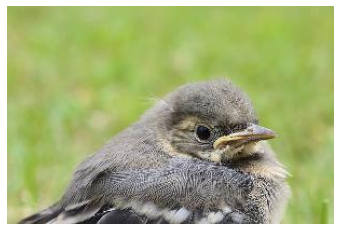

In [22]:
from matplotlib.image import imread
pic = imread('data/baby_bird.jpeg')
plt.imshow(pic)
plt.xticks([])
plt.yticks([]);

### 2b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. This means we are going from a 3D array to a 2D array. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [23]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''

    r,c,rbg= img.shape


    array = np.reshape(img, (r*c, rbg))

    return array

    pass

In [24]:
flat_pic = flatten(pic)
print(flat_pic.shape)

(61206, 3)


### 2c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [26]:
bird = kmeans.KMeans(flat_pic)
bird.cluster(3)

(974.2097161628756, 18)

In [27]:
bird.replace_color_with_centroid()

### 2d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

([], [])

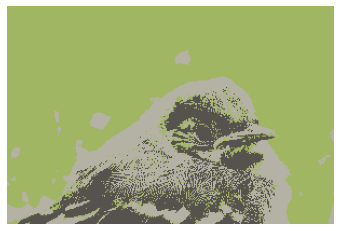

In [28]:
reshape = np.reshape(bird.data, (pic.shape[0], pic.shape[1], pic.shape[2]))
plt.imshow(reshape)
plt.xticks([])
plt.yticks([])

### 2e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

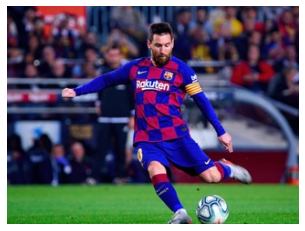

In [30]:
pic = imread('data/messi_small.jpeg')
plt.imshow(pic)
plt.xticks([])
plt.yticks([]);

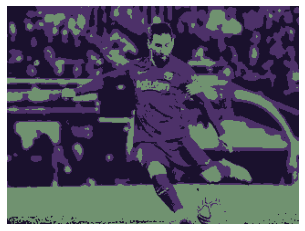

In [31]:
flat_pic = flatten(pic)

bird = kmeans.KMeans(flat_pic)
bird.cluster(3)

bird.replace_color_with_centroid()

reshape = np.reshape(bird.data, (pic.shape[0], pic.shape[1], pic.shape[2]))
plt.imshow(reshape)
plt.xticks([])
plt.yticks([]);

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

### 3) Cluster additional datasets

For one of my extensions, I decided to run clustering on a data set for california housing using Latitude and Longitude as our two features and median income as the clustering. the data set can be found here https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means/data

(20640, 3)


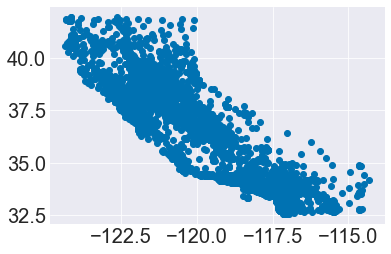

In [106]:
data = pd.read_csv('data/housing.csv')
s_data = data[["MedInc","Latitude","Longitude"]].to_numpy()

plt.scatter(s_data[:, 2],s_data[:, 1],)




Looking at the elbow plot we see that a k of 6 is pretty good to use

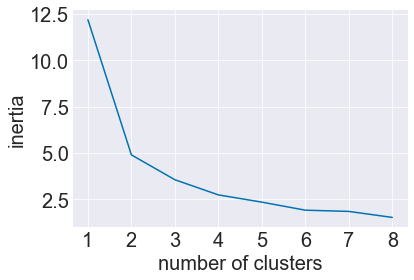

In [110]:
k_s = kmeans.KMeans(s_data)
k_s.elbow_plot(8)

After creating a sub array of the features I wanted to use, I ran Kmeans on it with K equals to 6 from the graph we see it has created segments based on longitude and latitude. 

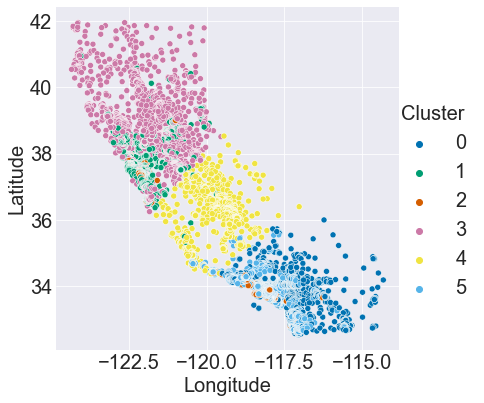

In [85]:
from sklearn.cluster import KMeans
import seaborn as sns

df = pd.read_csv('data/housing.csv')

s_data = df.loc[:, ["MedInc", "Latitude", "Longitude"]]


#kmeans = KMeans(n_clusters=6)
s_data["Cluster"] = kmeans.fit_predict(s_data)
s_data["Cluster"] = X["Cluster"].astype("category")

sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=s_data, height=6,
)


Looking at the MedHouseVal we see that the clustering is separate across it therefore this was our target and lets us know that the clustering is good and that the higher income is usually on the coast.

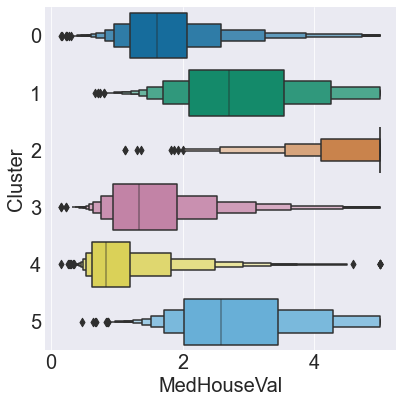

In [86]:
s_data["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=s_data, kind="boxen", height=6);

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. siloutte score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

For one of my extensions, I researched siloutte score and tried to implement it. I used https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/ as my referance and it was really helpful in helping me understand siloutte scores. The siloutte score measures how well a point fits its cluster by taking the mean of the distance between it and all the other points in the next closest cluster and subtracts that the mean distance between it and all the points in its cluster. It then divides that by the max of the two means. This results in a value between -1 and 1. A value close to -1 suggests a poor fit and that the samples might be in the wrong clusters. A value close to 0 suggests overlapping clusters and that some samples are on the border between 2 or more clusters. A value close to 1 suggests a good fit and that the cluster is dense and well separated. After reading about it and understanding it, I implemented it in my Kmeans class under the function siloutte plot(). As seen below when I ran it on the super simple data set, it produced a plot very similar to the elbow plot and this makes sense since the data is very simple and contains 3 clusters. 

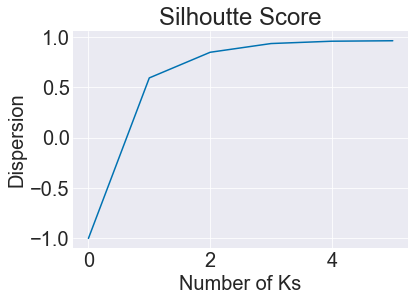

In [56]:
cluster.siloutte_plot(6)